# Suggested Exercise 5

Student: DC427182

In [37]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
# loading the data
nsfg = pd.read_hdf('nsfg.hdf5')

## Question 1

- **01.01: How many respondents refused to answer this question?**

One (1) respondent refused to answer this question.

- **01.02: Show the screen(s) captured indicating the web address from which you discover the related data to answer the above question.**

![01.02](./img/01.02.png)

- **01.03: Print the full Web address (URL) in the forum under your REPLY.**

https://www.cdc.gov/nchs/data/nsfg/2013-2015_NSFG_FemPregFile_Codebook-508.pdf

## Question 2

In [44]:
# defining the function
def answer_SugExe5_Q2():
    #02.01: Calculate the number of rows and columns in the DataFrame nsfg.
    print('1. The number of rows and columns in the DataFrame nsfg is:', nsfg.shape)
    #02.02: Display the names of the columns in nsfg.
    print('2. The names of the columns in nsfg are:', nsfg.columns)
    #02.03: Select the column 'birthwgt_oz1' and assign it to a new variable called ounces.
    ounces = nsfg['birthwgt_oz1']
    #02.04: Display the first 5 elements of ounces
    print('4. The first 5 elements of ounces are:', ounces.head())

# calling the function
answer_SugExe5_Q2()


1. The number of rows and columns in the DataFrame nsfg is: (9358, 10)
2. The names of the columns in nsfg are: Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')
4. The first 5 elements of ounces are: 0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


## Question 3

In [47]:
# defining the function
def answer_SugExe5_Q3():
    # 03.01: How many pregnancies in this dataset ended with a live birth?
    # option 1
    live_births = nsfg['outcome'] == 1
    print('op1. The number of pregnancies in this dataset that ended with a live birth is:', live_births.sum())
    # option 2
    live_births = nsfg['outcome'].value_counts().sort_index()
    print('op2. The number of pregnancies in this dataset that ended with a live birth is:', live_births[1])

# calling the function
answer_SugExe5_Q3()

op1. The number of pregnancies in this dataset that ended with a live birth is: 6489
op2. The number of pregnancies in this dataset that ended with a live birth is: 6489


## Question 4

In [50]:
# defining the function
def answer_SugExe5_Q4():
    # 04.01: In the 'nbrnaliv' column, replace the value 8, in place, with the special value NaN.
    # first check the values and their frequencies in the column 'nbrnaliv'
    print('The values and their frequencies in the column nbrnaliv before any replacement are:', nsfg['nbrnaliv'].value_counts())
    # then, replace the value 8 with NaN
    nsfg.replace({'nbrnaliv': {8: pd.NA}}, inplace=True)
    # 04.02: Confirm that the value 8 no longer appears in this column by printing the values and their frequencies.
    print('The values and their frequencies in the column nbrnaliv now are:', nsfg['nbrnaliv'].value_counts())

# calling the function
answer_SugExe5_Q4()

The values and their frequencies in the column nbrnaliv before any replacement are: nbrnaliv
1.0    6379
2.0     100
3.0       5
8.0       1
Name: count, dtype: int64
The values and their frequencies in the column nbrnaliv now are: nbrnaliv
1.0    6379
2.0     100
3.0       5
Name: count, dtype: int64


## Question 5

In [53]:
# defining the function
def answer_SugExe5_Q5():
   # 05.01: Select 'agecon' and 'agepreg', divide them by 100, and assign them to the local variables agecon and agepreg.
    agecon = nsfg['agecon'] / 100
    agepreg = nsfg['agepreg'] / 100
   # 05.02: Compute the difference, which is an estimate of the duration of the pregnancy. Keep in mind that for each pregnancy, agepreg will be larger than agecon.
    preg_length = agepreg - agecon
   # 05.03: Use .describe() to compute the mean duration and other summary statistics. Use the method on the preg_length variable.
    print('The summary statistics of the duration of the pregnancy are:', preg_length.describe())

# calling the function
answer_SugExe5_Q5()

The summary statistics of the duration of the pregnancy are: count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


## Question 6


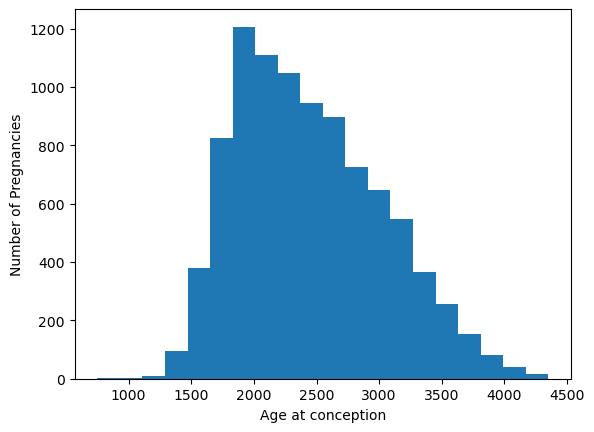

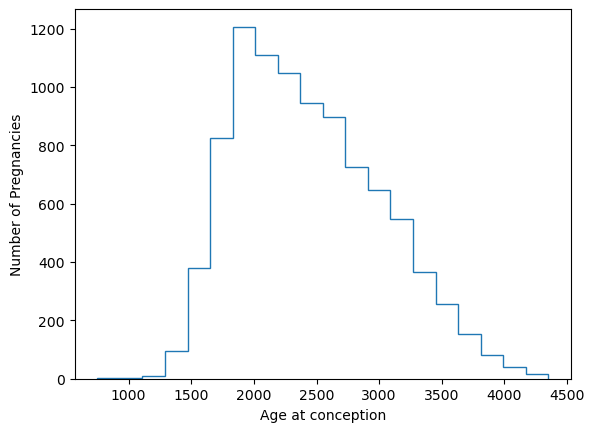

In [56]:
# defining the function
def answer_SugExe5_Q6():
    # 06.01: Plot a histogram of agecon with 20 bins. Use plt.hist() to plot your histogram and be sure to set the bins parameter to 20. Label the x-axis as "Age at conception", and the y-axis as "Number of Pregnancies".
    plt.hist(nsfg['agecon'], bins=20)
    plt.xlabel('Age at conception')
    plt.ylabel('Number of Pregnancies')
    plt.show()

    # 06.02: Adapt your code to make an unfilled histogram by setting the parameter histtype to be 'step'.
    plt.hist(nsfg['agecon'], bins=20, histtype='step')
    plt.xlabel('Age at conception')
    plt.ylabel('Number of Pregnancies')
    plt.show()

# calling the function
answer_SugExe5_Q6()

## Question 7

In [58]:
# defining the function
def answer_SugExe5_Q7():
    # 07.00: Figure out as a research question on how the "resample_rows_wighted()" should be written - this is a pay-forward question.
    # 07.01: Make a Boolean Series called full_term that is true for babies with 'prglngth' greater than or equal to 37 weeks.
    full_term = nsfg['prglngth'] >= 37
    # 07.02: Use full_term and birth_weight to select birth weight in pounds for full-term babies. Store the result in full_term_weight.
    full_term_weight = nsfg.loc[full_term, 'birthwgt_lb1']
    # 07.03: Compute the mean weight of full-term babies.
    print('The mean weight of full-term babies is:', full_term_weight.mean())

# calling the function
answer_SugExe5_Q7()

The mean weight of full-term babies is: 8.255738880918221


## Question 8

In [60]:
# defining the function
def answer_SugExe5_Q8():
    # 08.01: Use the variable 'nbrnaliv' to make a Boolean Series that is True for single births (where 'nbrnaliv' equals 1) and False otherwise.
    single = nsfg['nbrnaliv'] == 1
    # 08.02: Use Boolean Series and logical operators to select single, full-term babies and compute their mean birth weight.
    full_term = nsfg['prglngth'] >= 37
    single_full_term_weight = nsfg.loc[single & full_term, 'birthwgt_lb1']
    print('The mean weight of single, full-term babies is:', single_full_term_weight.mean())
    # 08.03: For comparison, select multiple, full-term babies and compute their mean birth weight.
    multiple = nsfg['nbrnaliv'] > 1
    multiple_full_term_weight = nsfg.loc[multiple & full_term, 'birthwgt_lb1']
    print('The mean weight of multiple, full-term babies is:', multiple_full_term_weight.mean())

# calling the function
answer_SugExe5_Q8()

The mean weight of single, full-term babies is: 8.24669922228251
The mean weight of multiple, full-term babies is: 7.391304347826087
